## Import Libraries

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 22.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
msft_df = pd.read_csv("/content/gdrive/MyDrive/DS 340W/Final Research Paper/Datasets/MSFT_5Y.csv")
msft_df = msft_df.dropna()
msft_df = msft_df[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-22,64.120003,65.139999,64.120003,65.029999,60.704510,20680000
1,2017-03-23,64.940002,65.239998,64.769997,64.870003,60.555168,19269200
2,2017-03-24,65.360001,65.449997,64.760002,64.980003,60.657841,22617100
3,2017-03-27,64.629997,65.220001,64.349998,65.099998,60.769852,18614700
4,2017-03-28,64.959999,65.470001,64.650002,65.290001,60.947208,20080400


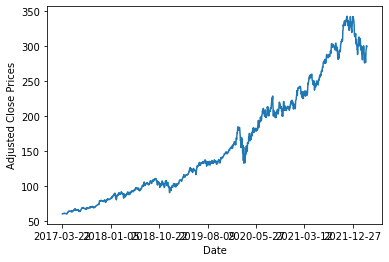

In [ ]:
msft_df.set_index("Date", inplace=True)
msft_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

## Step 1: Reading File

In [ ]:
MSFT = pd.read_csv("/content/gdrive/MyDrive/DS 340W/Final Research Paper/Datasets/MSFT_5Y.csv")
MSFT.set_index("Date", inplace=True)
MSFT.dropna(inplace=True)

## Step 2: Feature Selection

In [ ]:
x = MSFT.iloc[:, 0:5].values
y = MSFT.iloc[:, 4].values

## Step 3: Dividing Train and Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

## Step 4: Feature Scaling

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## Step 5: Hyperparameter Tuning

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
model = RandomForestRegressor()
rscv = RandomizedSearchCV(estimator = model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8, 'bootstrap': False}


## Step 6: Applying Random Forest 

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)


[ 61.04089305 109.03821778  68.08261418 233.31385546  80.64386185
  61.10679347  94.15896099 116.36961902 107.7445796  130.41310642
 134.45024577 154.5036052  210.08824532 101.98370572 166.67509006
 216.9828099  208.82755355 323.78628968  69.19364581 287.73763499
 211.62792062  71.30083662 159.89363612 106.87642745 320.46918045
  87.1559617  210.44012207 249.74309476 100.52671465 186.36370671
  79.91851439 185.34603798 285.50133589  65.32407144 211.90280031
 132.97331316 197.28297791 134.2703595  103.8655129   96.96489369
  91.62304646 181.06753096 250.94986379 333.68297507 205.61520645
  60.689999   180.51096446 191.90756006  71.90341694 145.15243606
 209.80195642  89.03964467 292.16641054  66.22345612 134.79214734
 100.82330814 180.15431889 298.63889893  63.59750386  74.37468525
  97.37003543 176.1736893  278.03286353  90.65657994  98.61714492
 211.88508427 223.87857531 134.19804197 245.85543222 278.79319931
  78.64393019  81.08086688 208.35145175  61.05588468  72.77305248
 163.18476

## Step 7: Getting Metrics

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.2711
Mean Squared Error: 0.2037
Root Mean Squared Error: 0.4513
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.83 %.


## Step 8: Getting Future Days From Predicted Values and Plot

In [ ]:
predictions = MSFT.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data_msft.csv")
#colllects future days from predicted values
oneyear_df = MSFT.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions_msft.csv")
onemonth_df = MSFT.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions_msft.csv")
fivedays_df = MSFT.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions_msft.csv")

AttributeError: ignored